In [126]:
import numpy as np
import healpy as hp
import pymaster as nmt
import matplotlib.pyplot as plt

In [127]:
# Inputs

Nside = 64
lmax = 2*Nside-1
Nlbin = 10
Nsims = 500

Npixs = hp.nside2npix(Nside)

bC = nmt.NmtBin.from_lmax_linear(lmax, nlb=Nlbin, is_Dell=False)
bD = nmt.NmtBin.from_lmax_linear(lmax, nlb=Nlbin, is_Dell=True)
leff = bC.get_effective_ells()
Nbins = len(leff)

In [128]:
# Load and bin DL_cmb

CL_cmb = np.load('CL_cmb_nside64.npy')[:Nsims, 2]
Ncross = CL_cmb.shape[1]

CL_cmb_binned = np.zeros((Nsims, Nbins))
DL_cmb_binned = np.zeros((Nsims, Nbins))

for k in range(Nsims):
    CL_cmb_binned[k] = bC.bin_cell(CL_cmb[k, :2*Nside])
    DL_cmb_binned[k] = bD.bin_cell(CL_cmb[k, :2*Nside])

# Theoretical lensing CMB

ell = np.arange(2, 2*Nside)

CL_lens = hp.read_cl('../power_spectra/Cls_LiteBIRD_e2e_r0.fits')[2, 2:2*Nside]
DL_lens = CL_lens * ell*(ell+1) / (2*np.pi)

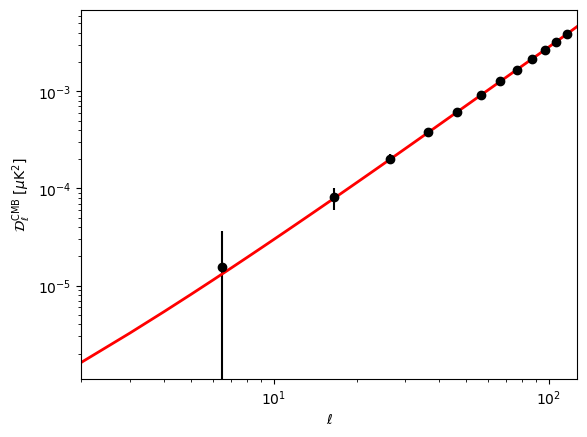

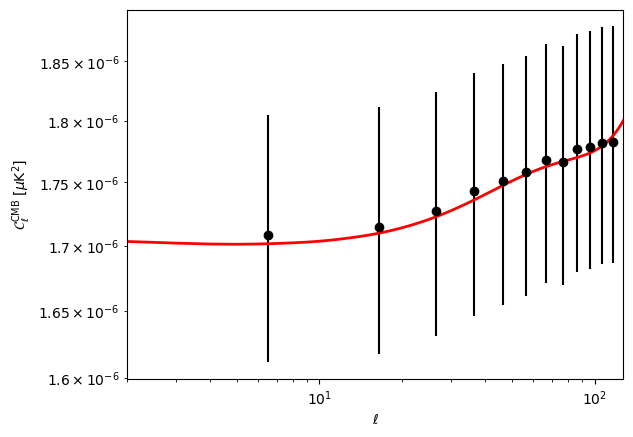

In [129]:
plt.errorbar(leff, np.mean(DL_cmb_binned, axis=0), yerr=np.std(DL_cmb_binned[:, i], axis=0), fmt='o', color='black')
plt.loglog(ell, DL_lens, linewidth=2, color='red')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\mathcal{D}_\ell^{\rm CMB}$ [$\mu$K$^2$]')
plt.xlim(2, 2*Nside-1)
plt.show()

plt.errorbar(leff, np.mean(CL_cmb_binned, axis=0), yerr=np.std(CL_cmb_binned[:, i], axis=0), fmt='o', color='black')
plt.loglog(ell, CL_lens, linewidth=2, color='red')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\mathcal{C}_\ell^{\rm CMB}$ [$\mu$K$^2$]')
plt.xlim(2, 2*Nside-1)
plt.show()